<a href="https://colab.research.google.com/github/sdeshmukh99/Generative-AI-Showcase/blob/main/Showcase_07/V2_Leveraging_LLMs_for_SQL_Querying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Required Modules

## Install Dependencies

In [ ]:
%%capture
# Suppresses the output of the cell (used to hide the installation logs and messages)

!pip -q install openai
# Quietly installs the OpenAI library, which is needed to interact with OpenAI's GPT models (like GPT-4)

!pip -q install langchain-openai
# Quietly installs LangChain's OpenAI-specific integrations for generating queries and processing language models

!pip -q install langchain-core
# Quietly installs LangChain's core functionality, which includes the main components for building LLM-driven workflows

!pip -q install langchain-community
# Quietly installs LangChain's community-based tools and integrations

!pip -q install sentence-transformers
# Quietly installs SentenceTransformers, a library used for text embeddings and similarity tasks, useful for working with LLMs

!pip -q install langchain-huggingface
# Quietly installs LangChain’s Hugging Face integration, enabling interaction with models hosted on the Hugging Face platform

!pip -q install langchain_experimental
# Quietly installs experimental features from LangChain, which may include new or less stable functionality


## Import Required Packages

In [ ]:
%%capture
# Suppresses the output of the cell (used to hide the logs or messages when importing libraries)

import os
# Imports the 'os' module to interact with the operating system for environment variables and file operations

import openai
# Imports the OpenAI library to interact with OpenAI's GPT models for language tasks

import pickle
# Imports the 'pickle' module to handle serialization and deserialization of Python objects, such as saving and loading data

import sqlite3
# Imports 'sqlite3' to interact with SQLite databases, used for storing and querying structured data

import numpy as np
# Imports NumPy, a library for handling arrays and performing numerical computations, often used in data processing

import pandas as pd
# Imports Pandas, a powerful library for data manipulation and analysis, commonly used with dataframes

import seaborn as sns
# Imports Seaborn, a visualization library built on top of Matplotlib, useful for creating statistical graphics

import matplotlib.pyplot as plt
# Imports Matplotlib's Pyplot module, which is used to create visualizations like charts and graphs

from getpass import getpass
# Imports 'getpass', a module to securely accept user input (like passwords) without showing them on the screen

from google.colab import userdata
# Imports 'userdata' module to access user-specific information or secrets stored in Google Colab

from langchain_core.prompts import PromptTemplate
# Imports 'PromptTemplate' from LangChain to define custom templates for generating prompts used by the LLM

from langchain_core.output_parsers import StrOutputParser
# Imports 'StrOutputParser' from LangChain to parse string outputs from the LLM, helping convert them into usable formats

from langchain.schema.runnable import RunnablePassthrough
# Imports 'RunnablePassthrough', a utility in LangChain that helps in passing data through a chain of operations without modification

from langchain_openai import ChatOpenAI
# Imports 'ChatOpenAI', a wrapper around OpenAI's GPT models that allows it to be integrated into LangChain workflows


# 2:  Data Loading and Preprocessing

## Nifty 50 Constituent Price data

In [ ]:
# The 'constituent_stock_prices.pkl' file should already be downloaded in Colab once you run the Setup cells given above
# Load the Nifty 50 data from the pickle file
csp = pickle.load(open('/content/constituent_stock_prices.pkl', 'rb'))
# Loads the data stored in the 'constituent_stock_prices.pkl' file using the 'pickle' module.
# The 'rb' mode means 'read binary', which is necessary for loading binary files like pickle files.
# 'csp' will hold a dictionary where each key is a company and the value is its associated stock price data.

In [1]:
# Display authorship message
print("This project was developed by Shantanu Deshmukh. Unauthorized copying is prohibited.")

This project was developed by Shantanu Deshmukh. Unauthorized copying is prohibited.


In [ ]:
# It's a dictionary with each company-name as a key
# This comment indicates that the loaded 'csp' object is a dictionary, where each key is a company name and the value is the company's stock price data.

type(csp)
# Checks the type of the 'csp' object to confirm that it's a dictionary, which holds the financial data for each company.


dict

In [ ]:
csp.keys()
# Returns the keys of the 'csp' dictionary, which are the names of the companies.
# Each key corresponds to a company's stock price data, which is stored in a DataFrame.


dict_keys(['ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BEL.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ITC.NS', 'INDUSINDBK.NS', 'INFY.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'NESTLEIND.NS', 'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SHRIRAMFIN.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TRENT.NS', 'ULTRACEMCO.NS', 'WIPRO.NS'])

In [ ]:
# Total companies
len(csp.keys())
# Returns the total number of companies in the 'csp' dictionary by counting the number of keys.
# This gives the number of companies (or datasets) available in the Nifty 50 data.


50

In [ ]:
# Checking no. of rows and columns in each dataframe
# This initializes two empty lists, 'rows' and 'cols', to store the number of rows and columns for each company's stock data.

rows = []
cols = []

for key in csp.keys():
    # Iterates over each company (key) in the 'csp' dictionary.

    print(f"{key:<15} {csp[key].shape}")
    # Prints the company name and the shape of its corresponding DataFrame (number of rows and columns).
    # The "{key:<15}" ensures the company name is printed in a left-aligned format with a width of 15 characters for neat alignment.

    rows.append(csp[key].shape[0])
    # Appends the number of rows for each company's stock data (the first element of the shape) to the 'rows' list.

    cols.append(csp[key].shape[1])
    # Appends the number of columns for each company's stock data (the second element of the shape) to the 'cols' list.


ADANIENT.NS     (5538, 5)
ADANIPORTS.NS   (4162, 5)
APOLLOHOSP.NS   (5536, 5)
ASIANPAINT.NS   (5536, 5)
AXISBANK.NS     (6472, 5)
BAJAJ-AUTO.NS   (5539, 5)
BAJFINANCE.NS   (5536, 5)
BAJAJFINSV.NS   (5505, 5)
BEL.NS          (5536, 5)
BPCL.NS         (7230, 5)
BHARTIARTL.NS   (5536, 5)
BRITANNIA.NS    (7233, 5)
CIPLA.NS        (7233, 5)
COALINDIA.NS    (3439, 5)
DRREDDY.NS      (7231, 5)
EICHERMOT.NS    (7231, 5)
GRASIM.NS       (5536, 5)
HCLTECH.NS      (5510, 5)
HDFCBANK.NS     (7234, 5)
HDFCLIFE.NS     (1707, 5)
HEROMOTOCO.NS   (5536, 5)
HINDALCO.NS     (7234, 5)
HINDUNILVR.NS   (7234, 5)
ICICIBANK.NS    (5536, 5)
ITC.NS          (7231, 5)
INDUSINDBK.NS   (5537, 5)
INFY.NS         (7234, 5)
JSWSTEEL.NS     (5316, 5)
KOTAKBANK.NS    (5798, 5)
LT.NS           (5539, 5)
M&M.NS          (7232, 5)
MARUTI.NS       (5272, 5)
NTPC.NS         (4925, 5)
NESTLEIND.NS    (5509, 5)
ONGC.NS         (7231, 5)
POWERGRID.NS    (4198, 5)
RELIANCE.NS     (7231, 5)
SBILIFE.NS      (1739, 5)
SHRIRAMFIN.N

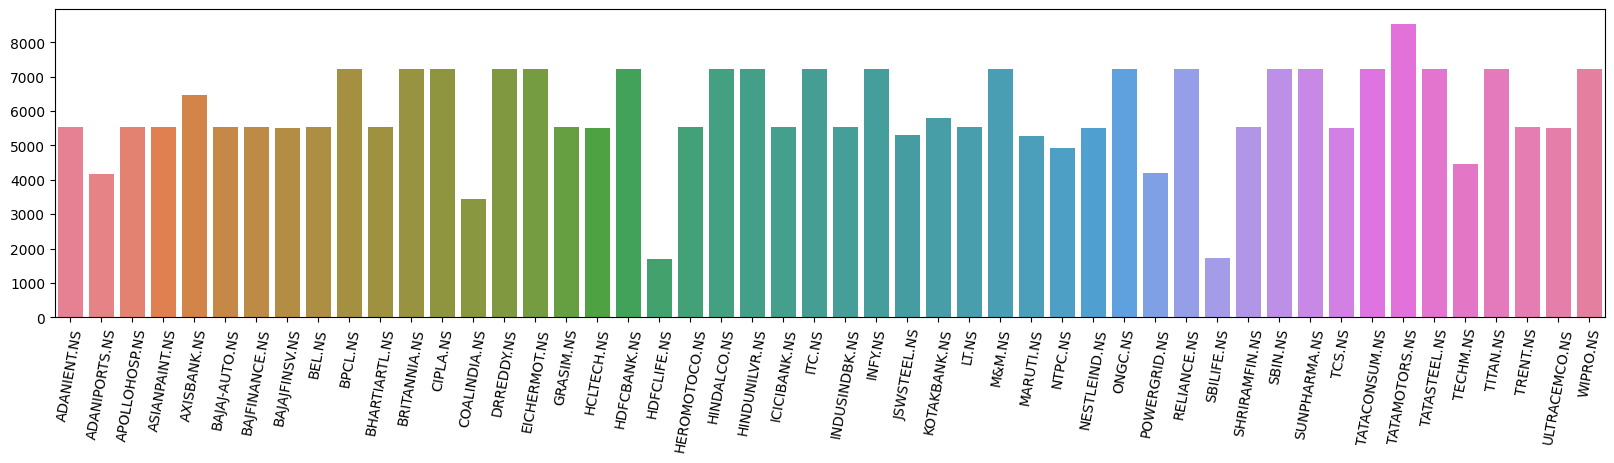

In [ ]:
# Visualize no. of rows in each dataframe
# This block creates a bar plot to visualize the number of rows (data points) available for each company's stock data.

plt.figure(figsize=(20, 4))
# Creates a new figure for the plot with a specified size (20 units wide and 4 units high) to accommodate many companies.

sns.barplot(x=csp.keys(), y=rows, hue=csp.keys())
# Uses Seaborn to create a bar plot where the x-axis represents the company names (keys from 'csp'),
# and the y-axis represents the number of rows (data points) for each company.
# 'hue=csp.keys()' adds color differentiation for each company.

plt.xticks(rotation=80)
# Rotates the x-axis labels (company names) by 80 degrees to prevent overlapping and make the labels readable.

plt.show()
# Displays the bar plot.


In [ ]:
# Checking a dataframe
# This block accesses and inspects the stock price data for the company 'ADANIENT.NS' (Adani Enterprises).

adani = csp['ADANIENT.NS']
# Retrieves the stock price data for 'ADANIENT.NS' (Adani Enterprises) from the 'csp' dictionary and stores it in the variable 'adani'.

print(adani.shape)
# Prints the shape of the 'adani' DataFrame (number of rows and columns), giving an idea of the size of the dataset for this company.

adani.head()
# Displays the first 5 rows of the 'adani' DataFrame, providing a quick look at the stock price data for Adani Enterprises.


(5538, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2002-07-01,1.364148,1.401700,1.334259,1.362615,1080397
2002-07-02,1.386372,1.390971,1.356484,1.373344,1016147
2002-07-03,1.371811,1.387139,1.364914,1.373344,980394
2002-07-04,1.379475,1.401700,1.379475,1.381008,972747
2002-07-05,1.388672,1.388672,1.372578,1.377942,974496


In [ ]:
# Checking TCS dataframe
# This block accesses and inspects the stock price data for the company 'TCS.NS' (Tata Consultancy Services).

tcs = csp['TCS.NS']
# Retrieves the stock price data for 'TCS.NS' (Tata Consultancy Services) from the 'csp' dictionary and stores it in the variable 'tcs'.

print(tcs.shape)
# Prints the shape of the 'tcs' DataFrame (number of rows and columns), giving an idea of the size of the dataset for this company.

tcs.head()
# Displays the first 5 rows of the 'tcs' DataFrame, providing a quick look at the stock price data for TCS.


(5507, 5)


,Open,High,Low,Close,Volume
Date,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,811856


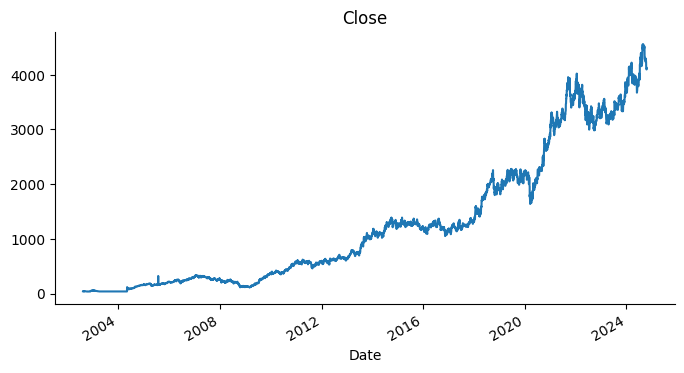

In [ ]:
# Plot 'Close' column values
# This block creates a line plot to visualize the 'Close' prices of TCS over time.

tcs['Close'].plot(kind='line', figsize=(8, 4), title='Close')
# Plots the 'Close' column from the 'tcs' DataFrame, which represents the stock's closing price over time.
# 'kind='line'' specifies that this should be a line plot, and 'figsize=(8, 4)' sets the plot size.
# 'title='Close'' adds a title to the plot.

plt.gca().spines[['top', 'right']].set_visible(False)
# This line hides the top and right spines (borders) of the plot, giving it a cleaner look.


In [ ]:
# Checking Wipro dataframe
# This block accesses and inspects the stock price data for the company 'WIPRO.NS' (Wipro Limited).

wipro = csp['WIPRO.NS']
# Retrieves the stock price data for 'WIPRO.NS' (Wipro Limited) from the 'csp' dictionary and stores it in the variable 'wipro'.

print(wipro.shape)
# Prints the shape of the 'wipro' DataFrame (number of rows and columns), giving an idea of the size of the dataset for this company.

wipro.head()
# Displays the first 5 rows of the 'wipro' DataFrame, providing a quick look at the stock price data for Wipro.


(7234, 5)


,Open,High,Low,Close,Volume
Date,,,,,
1996-01-01,1.1250,1.1250,1.1250,1.1250,19999
1996-01-02,1.0375,1.0375,1.0375,1.0375,39999
1996-01-03,1.0750,1.0750,1.0750,1.0750,19999
1996-01-04,1.0750,1.0750,1.0750,1.0750,119999
1996-01-05,1.0750,1.0750,1.0750,1.0750,0


## **Combine Prices data**

In [ ]:
# Combine 50 dataframes into one, Add a column 'Symbol' to distinguish that the row data is for that particular company
# This block consolidates the individual stock price DataFrames for each company into a single combined DataFrame, and adds a 'Symbol' column to identify the company.

comb_df = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol'])
# Creates an empty DataFrame 'comb_df' with predefined columns ('Date', 'Open', 'High', 'Low', 'Close', 'Volume', and 'Symbol').
# The 'Symbol' column will later be used to store the company name.

for key in csp.keys():
    # Iterates over each company (key) in the 'csp' dictionary.

    tmp_df = csp[key].copy()
    # Creates a copy of the company's DataFrame to avoid modifying the original data.

    tmp_df.reset_index(inplace=True)
    # Resets the index of the DataFrame so that the date becomes a regular column (not an index).

    tmp_df['Symbol'] = key.split('.')[0]
    # Adds a 'Symbol' column to the DataFrame, where the symbol is derived from the company name (e.g., 'TCS' from 'TCS.NS').
    # 'key.split('.')[0]' splits the company name on the '.' character and takes the first part (company ticker).

    comb_df = pd.concat([comb_df, tmp_df], ignore_index=True)
    # Concatenates the individual company's DataFrame 'tmp_df' into the 'comb_df' DataFrame.
    # 'ignore_index=True' ensures that the indexes of the combined DataFrame are reset, creating a continuous index.



<ipython-input-16-2276704db8d2>:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comb_df = pd.concat([comb_df, tmp_df], ignore_index=True)


In [ ]:
comb_df.head()

,Date,Open,High,Low,Close,Volume,Symbol
0,2002-07-01,1.364148,1.401700,1.334259,1.362615,1080397,ADANIENT
1,2002-07-02,1.386372,1.390971,1.356484,1.373344,1016147,ADANIENT
2,2002-07-03,1.371811,1.387139,1.364914,1.373344,980394,ADANIENT
3,2002-07-04,1.379475,1.401700,1.379475,1.381008,972747,ADANIENT
4,2002-07-05,1.388672,1.388672,1.372578,1.377942,974496,ADANIENT


In [ ]:
comb_df.head()
# Displays the first 5 rows of the combined DataFrame 'comb_df', which now contains stock data from all Nifty 50 companies with an additional 'Symbol' column to identify each company.


(298509, 7)

In [ ]:
# Cross-check no. of total rows
sum(rows)
# Calculates and returns the total number of rows (data points) across all company DataFrames.
# 'rows' is the list containing the number of rows for each company's DataFrame, and 'sum(rows)' gives the total data points.


298509

In [ ]:
comb_df.tail()
# Displays the last 5 rows of the combined DataFrame 'comb_df', providing a quick look at the most recent data points in the dataset.


,Date,Open,High,Low,Close,Volume,Symbol
298504,2024-10-11,520.349976,534.400024,520.349976,528.299988,4218491,WIPRO
298505,2024-10-14,538.700012,551.849976,536.299988,549.549988,16568133,WIPRO
298506,2024-10-15,552.849976,552.849976,530.849976,532.950012,10800626,WIPRO
298507,2024-10-16,533.000000,538.799988,529.000000,532.150024,6276811,WIPRO
298508,2024-10-18,532.000000,558.400024,524.799988,550.849976,20158218,WIPRO


In [ ]:
# Save the combined dataframe as csv file
comb_df.to_csv('all_stock_prices.csv', index=False)
# Saves the combined DataFrame 'comb_df' to a CSV file named 'all_stock_prices.csv'.
# 'index=False' ensures that the DataFrame's index is not written to the CSV file, keeping only the actual data columns.


# 3: Create a SQLite Database (in-memory)

In [ ]:
import sqlite3
# Imports the 'sqlite3' library, which provides an interface for interacting with SQLite databases in Python.

print(sqlite3.sqlite_version)
# Prints the version of SQLite being used, which helps verify that SQLite is available and ready to use.


3.37.2


In [ ]:
# Connect to a sqlite DB (It will create it if it doesn't exist)
# This block establishes a connection to an SQLite database file. If the file does not already exist, it will be created.

conn = sqlite3.connect('stock_db.sqlite')
# Creates a connection to the SQLite database file 'stock_db.sqlite'.
# If the file doesn't exist, SQLite will create it in the current working directory.
# The 'conn' object will be used to interact with the database (run queries, insert data, etc.).

print("Opened database successfully")
# Prints a confirmation message to indicate that the connection to the database was successful.


Opened database successfully


### Create table **`stock_prices`**

In [ ]:
comb_df.columns
# Displays the column names of the combined DataFrame 'comb_df'.
# This helps in confirming the structure of the DataFrame and ensures all necessary columns are present (e.g., 'Date', 'Open', 'Close', 'Symbol', etc.).


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Symbol'], dtype='object')

In [ ]:
# Create a table 'stock_prices' in DB
# This block creates a new table in the SQLite database to store the stock prices.

conn.execute('''
CREATE TABLE IF NOT EXISTS stock_prices(
                      date DATE,
                      open DOUBLE,
                      high DOUBLE,
                      low DOUBLE,
                      close DOUBLE,
                      volume INT,
                      symbol VARCHAR(20));''')
# Executes an SQL statement to create a table named 'stock_prices' in the SQLite database if it doesn't already exist.
# The table has the following columns:
# 'date': the date of the stock prices (type: DATE),
# 'open', 'high', 'low', 'close': stock price values (type: DOUBLE),
# 'volume': the volume of stocks traded (type: INT),
# 'symbol': the company symbol (type: VARCHAR(20)) to identify which company's data is being stored.

conn.commit()
# Commits the changes to the database, ensuring that the table creation is saved.

print("Table created successfully")
# Prints a confirmation message indicating that the 'stock_prices' table was successfully created in the database.


Table created successfully


In [ ]:
# Show tables
# This block retrieves and displays all the tables present in the SQLite database.

cursor = conn.execute('''
SELECT name FROM sqlite_master WHERE type='table';
''')
# Executes an SQL query that selects the names of all tables in the SQLite database.
# The 'sqlite_master' table holds metadata about all database objects, and 'WHERE type='table'' ensures that only table names are returned.

for row in cursor:
    print(row)
# Iterates over the results (the names of the tables) and prints each table name to the console.


('stock_prices',)


### Insert data into **`stock_prices`** table

In [ ]:
# Function to convert the 'date' from Timestamp to String yyyy-mm-dd
# This function takes a date object (or timestamp) and converts it into a string format 'yyyy-mm-dd'.

def convert_date(date):
    # Defines the function 'convert_date' that accepts a date object as its input.

    yyyy = date.year
    # Extracts the year from the date object.

    mm = date.month
    # Extracts the month from the date object.

    dd = date.day
    # Extracts the day from the date object.

    if mm < 10:
        mm = '0' + str(mm)
    # If the month is a single digit (e.g., 3 for March), this adds a leading zero (e.g., '03').

    if dd < 10:
        dd = '0' + str(dd)
    # If the day is a single digit (e.g., 7), this adds a leading zero (e.g., '07').

    return f"{yyyy}-{mm}-{dd}"
    # Returns the formatted date as a string in 'yyyy-mm-dd' format.



In [ ]:
comb_df['Date'][0], convert_date(comb_df['Date'][0])
# This retrieves the first date entry from the 'Date' column of the 'comb_df' DataFrame.
# Then, it calls the 'convert_date' function to convert this date from a timestamp to a string in 'yyyy-mm-dd' format.
# The result is displayed as a tuple with both the original and the converted date.


(Timestamp('2002-07-01 00:00:00'), '2002-07-01')

In [ ]:
comb_df['Date'] = comb_df['Date'].apply(convert_date)
# Applies the 'convert_date' function to every entry in the 'Date' column of the 'comb_df' DataFrame.
# This converts all the date values from timestamps to strings in 'yyyy-mm-dd' format.

comb_df.head(3)
# Displays the first 3 rows of the updated 'comb_df' DataFrame to verify that the 'Date' column has been successfully converted to string format.


,Date,Open,High,Low,Close,Volume,Symbol
0,2002-07-01,1.364148,1.401700,1.334259,1.362615,1080397,ADANIENT
1,2002-07-02,1.386372,1.390971,1.356484,1.373344,1016147,ADANIENT
2,2002-07-03,1.371811,1.387139,1.364914,1.373344,980394,ADANIENT


In [ ]:
# Insert stock prices data
# This block inserts the stock price data from the 'comb_df' DataFrame into the 'stock_prices' table in the SQLite database.

conn.executemany('''
INSERT INTO stock_prices (date, open, high, low, close, volume, symbol) VALUES (?, ?, ?, ?, ?, ?, ?)
''', comb_df.values)
# Executes an SQL 'INSERT' statement to insert multiple rows of data into the 'stock_prices' table.
# 'comb_df.values' extracts the values from the DataFrame (as a list of tuples) and inserts them into the corresponding columns in the database.
# The '?' placeholders are filled by the values from the DataFrame (i.e., 'date', 'open', 'high', 'low', 'close', 'volume', and 'symbol').

conn.commit()
# Commits the transaction to the database, ensuring that all the data is saved.

print("Data inserted successfully!")
# Prints a confirmation message to indicate that the data has been successfully inserted into the database.


Data inserted successfully!


### **Query the Database**

In [ ]:
# Show table content
# This block retrieves and prints the first 10 rows from the 'stock_prices' table in the SQLite database.

cursor = conn.execute('''
SELECT * from stock_prices limit 10;
''')
# Executes an SQL query that selects all columns from the 'stock_prices' table and retrieves the first 10 rows.

for row in cursor:
    print(row)
# Iterates over the rows returned by the query and prints each row to the console.


('2002-07-01', 1.3641480207443237, 1.4017000198364258, 1.334259033203125, 1.3626149892807007, 1080397, 'ADANIENT')
('2002-07-02', 1.3863719701766968, 1.3909709453582764, 1.356484055519104, 1.3733439445495605, 1016147, 'ADANIENT')
('2002-07-03', 1.371811032295227, 1.3871389627456665, 1.3649139404296875, 1.3733439445495605, 980394, 'ADANIENT')
('2002-07-04', 1.3794749975204468, 1.4017000198364258, 1.3794749975204468, 1.3810080289840698, 972747, 'ADANIENT')
('2002-07-05', 1.3886719942092896, 1.3886719942092896, 1.3725780248641968, 1.3779419660568237, 974496, 'ADANIENT')
('2002-07-08', 1.3948030471801758, 1.4545799493789673, 1.3649139404296875, 1.4384859800338745, 1061686, 'ADANIENT')
('2002-07-09', 1.4331209659576416, 1.4407850503921509, 1.3917369842529297, 1.4009339809417725, 1024719, 'ADANIENT')
('2002-07-10', 1.4101300239562988, 1.4101300239562988, 1.3871389627456665, 1.3994009494781494, 946638, 'ADANIENT')
('2002-07-11', 1.449215054512024, 1.449215054512024, 1.3725780248641968, 1.3764

In [ ]:
# Show table content for WIPRO
# This block retrieves and prints the first 10 rows of data from the 'stock_prices' table where the 'symbol' is 'WIPRO'.

cursor = conn.execute('''
SELECT * from stock_prices WHERE symbol='WIPRO' limit 10;
''')
# Executes an SQL query to select all columns from the 'stock_prices' table where the 'symbol' is 'WIPRO', limiting the result to the first 10 rows.

for row in cursor:
    print(row)
# Iterates over the rows returned by the query and prints each row to the console.


('1996-01-01', 1.125, 1.125, 1.125, 1.125, 19999, 'WIPRO')
('1996-01-02', 1.037500023841858, 1.037500023841858, 1.037500023841858, 1.037500023841858, 39999, 'WIPRO')
('1996-01-03', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 19999, 'WIPRO')
('1996-01-04', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 119999, 'WIPRO')
('1996-01-05', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0, 'WIPRO')
('1996-01-08', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0, 'WIPRO')
('1996-01-09', 1.0824999809265137, 1.0824999809265137, 1.0750000476837158, 1.0750000476837158, 39999, 'WIPRO')
('1996-01-10', 1.0750000476837158, 1.0765000581741333, 1.0750000476837158, 1.0765000581741333, 59999, 'WIPRO')
('1996-01-11', 1.0765000581741333, 1.087499976158142, 1.065000057220459, 1.0750000476837158, 79999, 'WIPRO')
('1996-01-12', 1.0750000476837158, 1.0750000476837158, 1.075000047

In [ ]:
# Show number of rows in table
# This block retrieves and prints the total number of rows (records) in the 'stock_prices' table.

cursor = conn.execute('''
SELECT count(*) from stock_prices;
''')
# Executes an SQL query to count the total number of rows in the 'stock_prices' table.

for row in cursor:
    print(row)
# Iterates over the result (which contains the row count) and prints the count to the console.


(298509,)


In [ ]:
# Show columns info of table
# This block retrieves and prints the schema (column information) of the 'stock_prices' table.

cursor = conn.execute('''
PRAGMA table_info(stock_prices);
''')
# Executes an SQL PRAGMA command that returns metadata about the 'stock_prices' table, including column names, data types, and other properties.

for row in cursor:
    print(row)
# Iterates over the rows returned by the query (one for each column in the table) and prints each row to the console.


(0, 'date', 'DATE', 0, None, 0)
(1, 'open', 'DOUBLE', 0, None, 0)
(2, 'high', 'DOUBLE', 0, None, 0)
(3, 'low', 'DOUBLE', 0, None, 0)
(4, 'close', 'DOUBLE', 0, None, 0)
(5, 'volume', 'INT', 0, None, 0)
(6, 'symbol', 'VARCHAR(20)', 0, None, 0)


# 4: SQL Query Generation using an LLM


In [ ]:
# Read OpenAI key from Colab Secrets
# This block retrieves the OpenAI API key stored in Colab's secret environment and sets it up for usage in the script.

from google.colab import userdata
# Imports the 'userdata' module from Google Colab, which allows access to environment variables and secrets.

api_key = userdata.get('OPENAI_API_KEY')           # <-- change this as per your secret's name
# Retrieves the OpenAI API key stored in Colab Secrets under the name 'OPENAI_API_KEY'.
# The secret name can be changed based on how the key was stored.

os.environ['OPENAI_API_KEY'] = api_key
# Sets the retrieved API key as an environment variable, so it can be accessed by other parts of the code.

openai.api_key = os.getenv('OPENAI_API_KEY')
# Assigns the API key from the environment variable to OpenAI’s Python SDK, allowing the SDK to authenticate API requests.


### **Load Model**

In [ ]:
# Load Model
# This block initializes an instance of the OpenAI LLM (Large Language Model) using LangChain.

from langchain_openai import ChatOpenAI
# Imports the 'ChatOpenAI' class from the LangChain OpenAI module, which provides an interface for interacting with OpenAI's language models.

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
# Creates an instance of the GPT-4 model with the 'gpt-4o-mini' variant.
# 'temperature=0' ensures deterministic behavior (the model generates consistent results for the same input), reducing randomness in the output.


In [ ]:
output = llm.invoke("What is 2 plus 3?")
# Sends the query "What is 2 plus 3?" to the GPT-4 model (llm) using the 'invoke' method, which generates a response.
# This serves as a basic test to check if the model is working and returning expected results.

output
# Displays the output from the model, which should be the answer to the mathematical query (i.e., 5).


AIMessage(content='2 plus 3 equals 5.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 15, 'total_tokens': 23, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc', 'finish_reason': 'stop', 'logprobs': None}, id='run-b24b5744-3f53-458f-a307-60d646688cd6-0', usage_metadata={'input_tokens': 15, 'output_tokens': 8, 'total_tokens': 23, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

### **Create Chain for Query Generation** using **LCEL** (**L**ang**C**hain **E**xpression **L**anguage)

In [ ]:
# Build prompt
# This block defines a template that will be used to generate SQL queries based on context and a user request.

template = """Use the following pieces of context to generate the SQL query with column names for the request given at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
{context}
Request: {request}
Generate query:"""
# This defines a multi-line string that serves as the prompt template.
# The template contains placeholders `{context}` for additional context (e.g., table schema) and `{request}` for the user's query.
# This prompt will guide the LLM to generate SQL queries based on the provided context and request.

PROMPT = PromptTemplate(input_variables=["context", "request"], template=template)
# Creates an instance of `PromptTemplate` with input variables 'context' and 'request'.
# The `PromptTemplate` class allows you to pass dynamic inputs into the predefined template, which will be used for generating SQL queries.


In [ ]:
# Query Generation Chain - created using LCEL (LangChain Expression Language)
# This block defines a chain using LangChain Expression Language (LCEL) to process the prompt and generate SQL queries.

chain = (PROMPT
         | llm
         | StrOutputParser()       # to get output in a more usable format
         )
# The 'PROMPT' is passed through a sequence of operations (or "chain").
# The 'PROMPT' first goes through the LLM (GPT-4 model) to process the query and generate an SQL query.
# The 'StrOutputParser()' is used to parse the model's output into a usable string format (as SQL queries are returned as text).
# This chain structure enables modular and sequential processing: the template, LLM, and output parsing are all connected in one flow.


In [ ]:
# Context
# This block defines the structure of the table that will be used as context for generating SQL queries.

table_info = """CREATE TABLE IF NOT EXISTS stock_prices (date DATE, open DOUBLE, high DOUBLE, low DOUBLE, close DOUBLE, volume INT, symbol VARCHAR(20));"""
# This is a string that represents the SQL statement to create the 'stock_prices' table if it doesn't already exist.
# It defines the columns 'date', 'open', 'high', 'low', 'close', 'volume', and 'symbol' with their respective data types.
# This 'table_info' string will be passed to the LLM as context so it understands the structure of the table when generating SQL queries.


### **Generate SQL Query then query the Database**

In [ ]:
# Generate SQL query
# This block sends a request to the LLM to generate an SQL query based on the provided context and user request.

response1 = chain.invoke({"request": "How many total records there in table?",
                          "context": table_info})
# 'chain.invoke()' is used to send a request and context to the LLM.
# The 'request' is the natural language query: "How many total records there in table?"
# The 'context' is the table structure defined in 'table_info'.
# The LLM will interpret the request and generate an appropriate SQL query to count the number of records in the 'stock_prices' table.

response1
# Displays the SQL query generated by the LLM in response to the given request.


'```sql\nSELECT COUNT(*) AS total_records FROM stock_prices;\n```'

In [ ]:
# Generate another query
# This block sends a different request to the LLM to generate an SQL query for retrieving unique company symbols from the table.

response2 = chain.invoke({"request": "What are unique companies symbols present in table?",
                          "context": table_info})
# 'chain.invoke()' is used to ask the LLM to generate an SQL query based on the new request: "What are unique companies symbols present in table?"
# The 'context' remains the same (the table schema provided in 'table_info').
# The LLM will generate an SQL query that retrieves unique values from the 'symbol' column in the 'stock_prices' table.

response2
# Displays the SQL query generated by the LLM in response to this new request.


'```sql\nSELECT DISTINCT symbol FROM stock_prices;\n```'

In [ ]:
# Generate another query
# This block sends a request to the LLM to generate an SQL query to retrieve ten records for Wipro company from the table.

response3 = chain.invoke({"request": "Give me any ten records for Wipro company?",
                          "context": table_info})
# 'chain.invoke()' is used to ask the LLM to generate an SQL query based on the request: "Give me any ten records for Wipro company?"
# The 'context' is the table schema provided in 'table_info'.
# The LLM will generate an SQL query that retrieves ten records from the 'stock_prices' table where the 'symbol' is 'WIPRO'.

response3
# Displays the SQL query generated by the LLM in response to this request.


"```sql\nSELECT * FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 10;\n```"

In [ ]:
# Generate another query
# This block sends a request to the LLM to generate an SQL query to retrieve the 'open' and 'high' prices for any ten records for Wipro.

response4 = chain.invoke({"request": "Need open, high prices for any ten Wipro records",
                          "context": table_info})
# 'chain.invoke()' is used to ask the LLM to generate an SQL query based on the request: "Need open, high prices for any ten Wipro records."
# The 'context' is the table schema provided in 'table_info'.
# The LLM will generate an SQL query that selects the 'open' and 'high' columns from the 'stock_prices' table where the 'symbol' is 'WIPRO', limiting the result to ten records.

response4
# Displays the SQL query generated by the LLM in response to this request.


"```sql\nSELECT open, high \nFROM stock_prices \nWHERE symbol = 'WIPRO' \nLIMIT 10;\n```"

### **Query the Database using generated SQL queries**

In [ ]:
# Generated Response1
# This block displays the SQL query generated by the LLM for the first request: "How many total records there in table?"

response1
# Shows the generated SQL query in the output, which is expected to be something like:
# "SELECT COUNT(*) FROM stock_prices;"


'```sql\nSELECT COUNT(*) AS total_records FROM stock_prices;\n```'

In [ ]:
import re
# Imports the 're' module for regular expressions, allowing for pattern matching and string manipulation.

def format_query(query):
    # Defines a function to clean up the SQL query generated by the LLM.

    query = re.sub(r"```sql\n|\n```", "", query).strip()
    # Uses a regular expression to remove any markdown formatting specific to SQL blocks (i.e., ```sql``` and newlines) from the query.
    # This ensures that the query is a clean SQL statement without extra characters.

    query = re.sub(r"\n", "", query).strip()
    # Removes any additional newline characters within the query and trims any leading/trailing whitespace.

    return query
    # Returns the cleaned and formatted query.

format_query(response1)
# Calls the 'format_query' function to clean and format the SQL query generated in 'response1'.


'SELECT COUNT(*) AS total_records FROM stock_prices;'

In [ ]:
# Use generated query to get data from database
# This block takes the formatted SQL query generated by the LLM, executes it against the SQLite database, and retrieves the results.

query = format_query(response1)
# Assigns the cleaned and formatted SQL query from 'response1' to the 'query' variable.

cursor = conn.execute(query)
# Executes the SQL query on the SQLite database using the connection object 'conn'.
# The result of the query is stored in 'cursor', which acts as an iterator over the result set.

for row in cursor:
    print(row)
# Iterates over each row in the result set and prints the data.
# Since 'response1' is a query for counting records, this will print the count of total records in the 'stock_prices' table.


(298509,)


In [ ]:
# Generated Response2
# This block cleans and formats the SQL query generated by the LLM for the second request: "What are unique companies symbols present in table?"

format_query(response2)
# Calls the 'format_query' function to clean and format the SQL query generated in 'response2'.
# This will remove any extra formatting or newline characters, making the SQL query ready for execution.
# The expected query would be something like:
# "SELECT DISTINCT(symbol) FROM stock_prices;"


'SELECT DISTINCT symbol FROM stock_prices;'

In [ ]:
# Use generated query to get data from database
# This block executes the formatted SQL query from 'response2' to retrieve unique company symbols from the database.

query = format_query(response2)
# Assigns the cleaned and formatted SQL query from 'response2' to the 'query' variable.

cursor = conn.execute(query)
# Executes the SQL query on the SQLite database using the connection object 'conn'.
# The result of the query is stored in 'cursor', which contains the unique company symbols.

for row in cursor:
    print(row)
# Iterates over each row in the result set (the unique symbols) and prints the data.
# The expected output will be a list of unique company symbols from the 'stock_prices' table.


('ADANIENT',)
('ADANIPORTS',)
('APOLLOHOSP',)
('ASIANPAINT',)
('AXISBANK',)
('BAJAJ-AUTO',)
('BAJFINANCE',)
('BAJAJFINSV',)
('BEL',)
('BPCL',)
('BHARTIARTL',)
('BRITANNIA',)
('CIPLA',)
('COALINDIA',)
('DRREDDY',)
('EICHERMOT',)
('GRASIM',)
('HCLTECH',)
('HDFCBANK',)
('HDFCLIFE',)
('HEROMOTOCO',)
('HINDALCO',)
('HINDUNILVR',)
('ICICIBANK',)
('ITC',)
('INDUSINDBK',)
('INFY',)
('JSWSTEEL',)
('KOTAKBANK',)
('LT',)
('M&M',)
('MARUTI',)
('NTPC',)
('NESTLEIND',)
('ONGC',)
('POWERGRID',)
('RELIANCE',)
('SBILIFE',)
('SHRIRAMFIN',)
('SBIN',)
('SUNPHARMA',)
('TCS',)
('TATACONSUM',)
('TATAMOTORS',)
('TATASTEEL',)
('TECHM',)
('TITAN',)
('TRENT',)
('ULTRACEMCO',)
('WIPRO',)


In [ ]:
# Generated Response3
# This block cleans and formats the SQL query generated by the LLM for the third request: "Give me any ten records for Wipro company?"

format_query(response3)
# Calls the 'format_query' function to clean and format the SQL query generated in 'response3'.
# This will remove extra formatting or newline characters, making the SQL query ready for execution.
# The expected query would be something like:
# "SELECT * FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 10;"


"SELECT * FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 10;"

In [ ]:
# Use generated query to get data from database
# This block executes the formatted SQL query from 'response3' to retrieve ten records for Wipro from the database.

query = format_query(response3)
# Assigns the cleaned and formatted SQL query from 'response3' to the 'query' variable.

cursor = conn.execute(query)
# Executes the SQL query on the SQLite database using the connection object 'conn'.
# The result of the query is stored in 'cursor', which contains ten records for Wipro.

for row in cursor:
    print(row)
# Iterates over each row in the result set (the records for Wipro) and prints the data.
# The expected output will be ten rows from the 'stock_prices' table where the symbol is 'WIPRO'.


('1996-01-01', 1.125, 1.125, 1.125, 1.125, 19999, 'WIPRO')
('1996-01-02', 1.037500023841858, 1.037500023841858, 1.037500023841858, 1.037500023841858, 39999, 'WIPRO')
('1996-01-03', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 19999, 'WIPRO')
('1996-01-04', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 119999, 'WIPRO')
('1996-01-05', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0, 'WIPRO')
('1996-01-08', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0, 'WIPRO')
('1996-01-09', 1.0824999809265137, 1.0824999809265137, 1.0750000476837158, 1.0750000476837158, 39999, 'WIPRO')
('1996-01-10', 1.0750000476837158, 1.0765000581741333, 1.0750000476837158, 1.0765000581741333, 59999, 'WIPRO')
('1996-01-11', 1.0765000581741333, 1.087499976158142, 1.065000057220459, 1.0750000476837158, 79999, 'WIPRO')
('1996-01-12', 1.0750000476837158, 1.0750000476837158, 1.075000047

In [ ]:
# Generated Response4
# This block cleans and formats the SQL query generated by the LLM for the fourth request: "Need open, high prices for any ten Wipro records."

format_query(response4)
# Calls the 'format_query' function to clean and format the SQL query generated in 'response4'.
# This will remove any extra formatting or newline characters, making the SQL query ready for execution.
# The expected query would be something like:
# "SELECT open, high FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 10;"


"SELECT open, high FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 10;"

In [ ]:
# Use generated query to get data from database
# This block executes the formatted SQL query from 'response4' to retrieve the 'open' and 'high' prices for any ten Wipro records from the database.

query = format_query(response4)
# Assigns the cleaned and formatted SQL query from 'response4' to the 'query' variable.

cursor = conn.execute(query)
# Executes the SQL query on the SQLite database using the connection object 'conn'.
# The result of the query is stored in 'cursor', which contains the 'open' and 'high' prices for ten Wipro records.

for row in cursor:
    print(row)
# Iterates over each row in the result set (the 'open' and 'high' prices for Wipro) and prints the data.
# The expected output will be ten rows showing 'open' and 'high' prices for Wipro from the 'stock_prices' table.


(1.125, 1.125)
(1.037500023841858, 1.037500023841858)
(1.0750000476837158, 1.0750000476837158)
(1.0750000476837158, 1.0750000476837158)
(1.0750000476837158, 1.0750000476837158)
(1.0750000476837158, 1.0750000476837158)
(1.0824999809265137, 1.0824999809265137)
(1.0750000476837158, 1.0765000581741333)
(1.0765000581741333, 1.087499976158142)
(1.0750000476837158, 1.0750000476837158)


# 5: Python Code generation using an LLM

In [ ]:
from langchain_experimental.utilities import PythonREPL
# Imports the 'PythonREPL' utility from the LangChain Experimental module, which allows execution of Python code in a REPL (Read-Eval-Print Loop) environment.

python_repl = PythonREPL()
# Creates an instance of 'PythonREPL', enabling you to execute Python commands dynamically within the notebook.


In [ ]:
python_repl.run("print(1+1)")
# Runs a simple Python command "print(1+1)" in the Python REPL environment.
# The result of this command will be printed as output, which in this case is '2'.
# This demonstrates the use of the REPL to execute Python commands on the fly.


'2\n'

In [ ]:
# You can create the tool to pass to an agent
# This block sets up a 'Tool' instance that wraps around the Python REPL, allowing agents or other components to use it for executing Python commands.

from langchain_core.tools import Tool
# Imports the 'Tool' class from LangChain's core tools module, used to create tools that can be passed to agents.

repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)
# Creates a 'Tool' object named 'python_repl'.
# The 'description' provides information about how to use the tool.
# The 'func' parameter specifies that the Python REPL function (i.e., 'python_repl.run') will be used to run commands.
# This tool can now be passed to an agent or another system to execute Python commands dynamically.



In [ ]:
repl_tool.run("print(1+1)")
# Uses the 'repl_tool' to run the Python command "print(1+1)".
# Since 'repl_tool' wraps around the Python REPL, it executes the command and prints the result, which is '2'.
# This shows that the tool is functioning and can be used to execute Python commands dynamically.


'2\n'

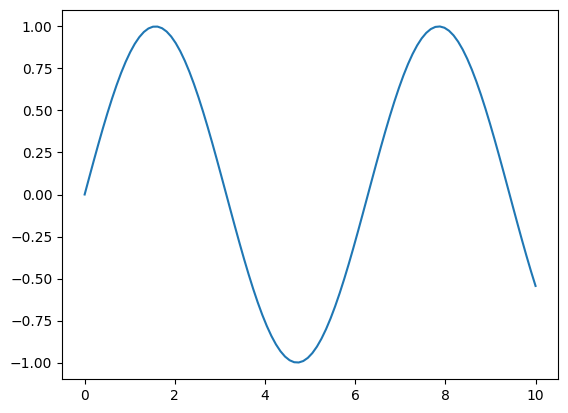

''

In [ ]:
# To plot a sine wave
# This block uses the 'repl_tool' to run a Python script that plots a sine wave using NumPy and Matplotlib.

repl_tool.run("""
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
# Generates 100 equally spaced points between 0 and 10, stored in 'x'.

y = np.sin(x)
# Calculates the sine of each value in 'x', storing the results in 'y'.

plt.plot(x, y)
# Creates a line plot of 'y' (sine values) against 'x'.

plt.show()
# Displays the plot of the sine wave.
""")
# The 'repl_tool' runs the entire block of code inside the triple quotes, plotting a sine wave.


In [ ]:
from langchain_openai import ChatOpenAI
# Imports the 'ChatOpenAI' class from LangChain's OpenAI module, which allows interaction with OpenAI's language models like GPT-4.

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
# Creates an instance of 'ChatOpenAI' with the model set to 'gpt-4o-mini'.
# The 'temperature=0' parameter means that the responses will be deterministic (no randomness), making the model stick to more predictable outputs.
# This instance will be used to interact with the LLM for generating responses or performing tasks like generating SQL queries.


In [ ]:
# Generate code using llm
# This block asks the language model (LLM) to generate Python code for creating sine waves.

response = llm.invoke('generate and return python code only, no additional text, a code to create sine waves')
# The 'llm.invoke' method sends the request to the GPT-4 model, asking it to generate Python code.
# The prompt explicitly instructs the LLM to return only Python code (without any additional explanations or comments).
# The result will be stored in the 'response' variable, which should contain Python code to plot a sine wave.


In [ ]:
print(response.content)
# This line prints the content of the 'response' variable, which contains the Python code generated by the LLM.
# The 'content' attribute holds the actual output (in this case, the sine wave Python code) generated in response to the prompt.
# By printing it, you can see the code that was created by the LLM based on the previous request.


```python
import numpy as np
import matplotlib.pyplot as plt

# Parameters
frequency = 1  # Frequency in Hz
amplitude = 1  # Amplitude
duration = 2   # Duration in seconds
sampling_rate = 1000  # Samples per second

# Time array
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(t, sine_wave)
plt.title('Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
```


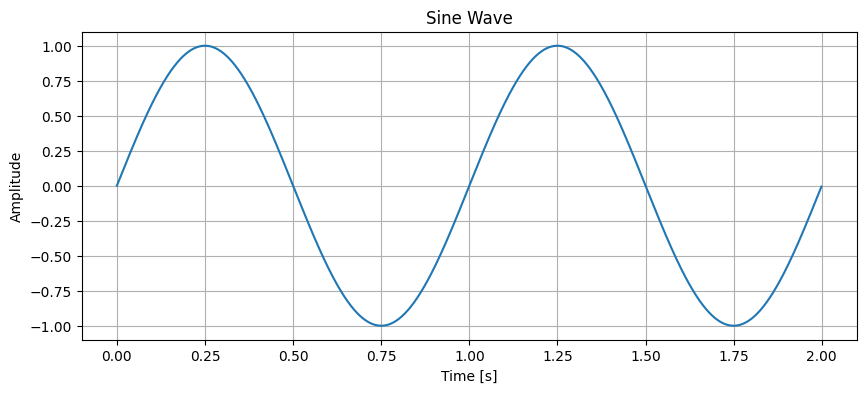

''

In [ ]:
# Execute the generated code
# This block takes the Python code generated by the LLM and executes it using the 'repl_tool'.

repl_tool.run(response.content)
# The 'repl_tool.run()' method is used to execute the content of the 'response', which contains the Python code generated earlier by the LLM.
# Since the response is expected to be code for creating a sine wave, this command will run that code and generate a plot.


### **Create another Chain for Code Generation** for Stock Prices

In [ ]:
# Build prompt to use the user_request, generated_sql_query, and extracted_data to generate Python code for insights
# This block sets up a template that combines user requests, SQL queries, and data to generate Python code for further insights.

template2 = """Use the following pieces of user request and sql query to generate python code to show insights related to the data given at the end.
Generate and return python code only, no additional text.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Request: {request}
Sql query: {sql_query}
Data: {data}
Generate code:"""
# This is a template for the prompt that will be sent to the LLM.
# The placeholders {request}, {sql_query}, and {data} will be filled with actual values when the prompt is used.
# The goal of this prompt is to instruct the LLM to generate Python code that provides insights based on the user's request, the generated SQL query, and the extracted data.

PROMPT2 = PromptTemplate(input_variables=["request", "sql_query", "data"], template=template2)
# This line creates an instance of the 'PromptTemplate' class with the placeholders: "request", "sql_query", and "data".
# 'PROMPT2' will be used to dynamically generate the final prompt that is sent to the LLM.


In [ ]:
# Code Generation Chain
# This block defines the process (or chain) to generate Python code for insights using the LLM.

chain2 = (PROMPT2
          | llm
          | StrOutputParser()
          )
# This creates a chain that connects the prompt (PROMPT2), the LLM (llm), and a string output parser (StrOutputParser).
# The chain works sequentially:
# 1. PROMPT2 prepares the prompt with the user request, SQL query, and data.
# 2. The prompt is passed to the LLM (GPT-4), which generates Python code.
# 3. The 'StrOutputParser()' formats the output to make it easier to use.
# This chain is now ready to generate Python code based on the user's request and the corresponding data.


### **First, Generate SQL Query for a user request**

In [ ]:
# Generate SQL query
# This block uses the LLM to generate an SQL query based on the user's request and the context (table schema).

user_request = "Need insights on the trend present in any 50 Wipro records"
# The user's natural language request asking for insights on trends in Wipro stock data.

generated_query = chain.invoke({"request": user_request,
                                "context": table_info})
# The 'chain.invoke()' method uses the prompt and context to generate an SQL query.
# 'request' is the user's query and 'context' contains the table schema (as defined earlier in 'table_info').
# The result is stored in 'generated_query', which should contain a valid SQL query to retrieve the data from the database.


"```sql\nSELECT date, open, high, low, close, volume \nFROM stock_prices \nWHERE symbol = 'WIPRO' \nLIMIT 50;\n```"

In [ ]:
format_query(generated_query)format_query(generated_query)
# This calls the 'format_query' function (defined earlier) to clean and format the SQL query generated by the LLM.
# It removes any unnecessary elements like markdown formatting (```sql) and extra newlines.
# The result is a well-formatted SQL query that can be executed on the database.


"SELECT date, open, high, low, close, volume FROM stock_prices WHERE symbol = 'WIPRO' LIMIT 50;"

### **Second, Extract Data from DB for the user request**

In [ ]:
# Use generated query to get data from the database

query = format_query(generated_query)
# Formats the generated SQL query for execution using the 'format_query' function.

cursor = conn.execute(query)
# Executes the formatted SQL query on the SQLite database using the 'conn' connection object.
# The result of the query is stored in the 'cursor', which allows row-by-row access to the query results.

extracted_data = []
# Initializes an empty list to store the data retrieved from the database.

for row in cursor:
    extracted_data.append(row)
# Iterates over each row returned by the cursor and appends it to the 'extracted_data' list.
# This effectively stores all the data from the query results into the list for further analysis.


In [ ]:
extracted_data[:2]
# This line retrieves and displays the first two rows from the 'extracted_data' list.
# It's a quick way to check if the query retrieved the expected data and view a sample of the output.


[('1996-01-01', 1.125, 1.125, 1.125, 1.125, 19999),
 ('1996-01-02',
  1.037500023841858,
  1.037500023841858,
  1.037500023841858,
  1.037500023841858,
  39999)]

### **Third, Generate Code for the user request**

In [ ]:
# Generate code

response1A = chain2.invoke({"request": user_request,
                            "sql_query": generated_query,
                            "data": extracted_data
                            })
# This line uses the 'chain2' (the code generation chain) to generate Python code.
# The 'invoke' method sends a request to the LLM that includes:
# 1. 'user_request': The user's original query for insights (e.g., trends in Wipro records).
# 2. 'sql_query': The SQL query generated earlier that retrieves relevant data from the database.
# 3. 'data': The extracted data retrieved from the database using the generated SQL query.
# The LLM will use this information to generate Python code for performing further analysis or insights based on the data.
# The generated Python code is stored in 'response1A'.


In [ ]:
# See the Generated code

print(response1A)
# This line prints the content of 'response1A', which contains the Python code generated by the LLM.
# It allows you to inspect the code that was generated based on the user request, SQL query, and data.


```python
import pandas as pd
import matplotlib.pyplot as plt

# Data from SQL query
data = [
    ('1996-01-01', 1.125, 1.125, 1.125, 1.125, 19999),
    ('1996-01-02', 1.037500023841858, 1.037500023841858, 1.037500023841858, 1.037500023841858, 39999),
    ('1996-01-03', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 19999),
    ('1996-01-04', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 119999),
    ('1996-01-05', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0),
    ('1996-01-08', 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 1.0750000476837158, 0),
    ('1996-01-09', 1.0824999809265137, 1.0824999809265137, 1.0750000476837158, 1.0750000476837158, 39999),
    ('1996-01-10', 1.0750000476837158, 1.0765000581741333, 1.0750000476837158, 1.0765000581741333, 59999),
    ('1996-01-11', 1.0765000581741333, 1.087499976158142, 1.065000057220459, 1.0750000476837158, 79999),
    ('19

### **At last, Execute the generated Code for the user request**

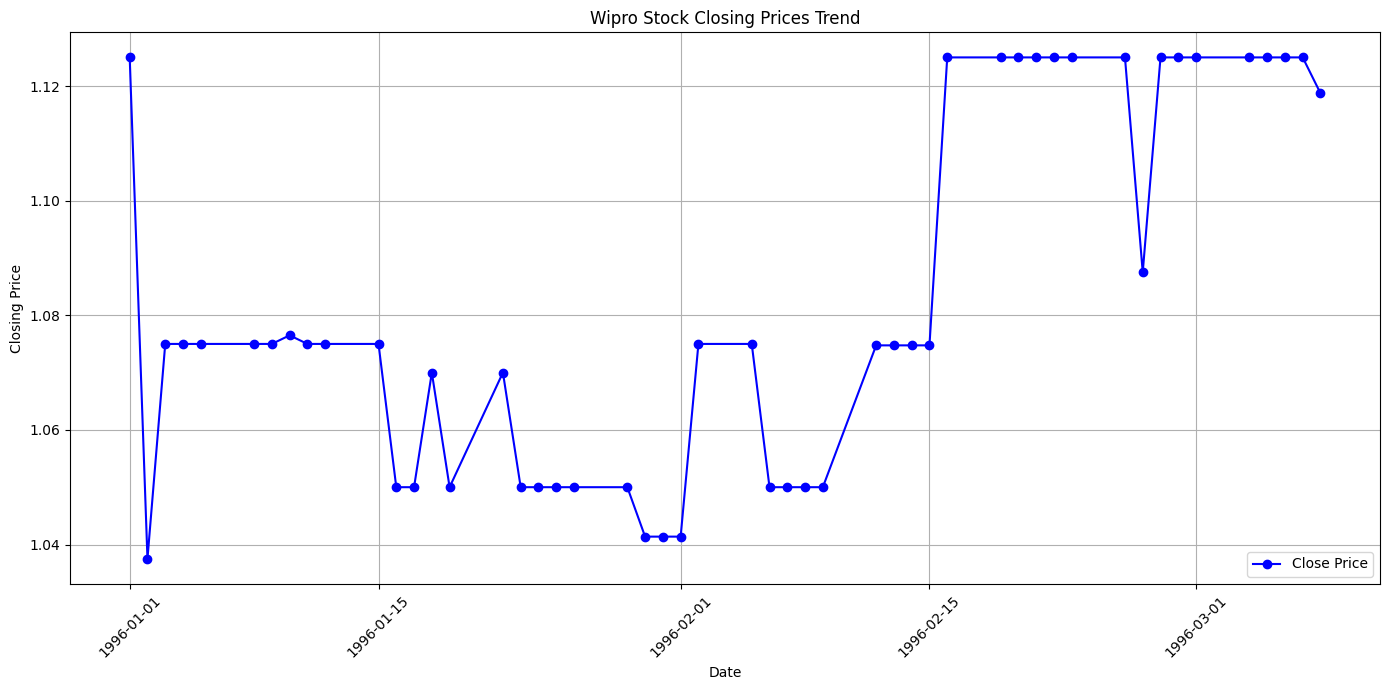

Basic Statistics:
            open       high        low      close         volume
count  50.000000  50.000000  50.000000  50.000000      50.000000
mean    1.080345   1.083262   1.078393   1.082167   46799.460000
std     0.031673   0.031600   0.033657   0.031736  106645.115009
min     1.030125   1.037500   1.000125   1.037500       0.000000
25%     1.050000   1.050312   1.050000   1.050000       0.000000
50%     1.075000   1.075000   1.075000   1.075000   19999.000000
75%     1.121875   1.125000   1.121875   1.125000   39999.000000
max     1.125000   1.125000   1.125000   1.125000  619999.000000



In [ ]:
# Execute the generated code

print(repl_tool.run(response1A))
# This line executes the Python code that was generated by the LLM using the 'repl_tool'.
# The 'repl_tool.run()' method runs the generated code and 'print()' is used to display the output of that execution.
# The result of the code execution (e.g., insights, visualizations) will be printed in the notebook.


In [ ]:
## Once done, close the connection to DB:

conn.close()
# This line closes the connection to the SQLite database.
# It's important to close the connection once all operations (queries, inserts) are done to release any resources being used by the database connection.
